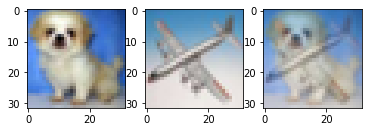

In [14]:
import operator
from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
import numpy

# suppose img1 and img2 are your two images
img1 = Image.open('dog4.png')
img2 = Image.open('airplane4.png')

# img1.show()
# img2.show()

# suppose img2 is to be shifted by `shift` amount 
shift = (0, 0)

# compute the size of the panorama
nw, nh = map(max, map(operator.add, img2.size, shift), img1.size)

# paste img1 on top of img2
newimg1 = Image.new('RGBA', size=(nw, nh), color=(0, 0, 0, 0))
newimg1.paste(img2, shift)
newimg1.paste(img1, (0, 0))

# paste img2 on top of img1
newimg2 = Image.new('RGBA', size=(nw, nh), color=(0, 0, 0, 0))
newimg2.paste(img1, (0, 0))
newimg2.paste(img2, shift)

# blend with alpha=0.5
result = Image.blend(newimg1, newimg2, alpha=0.5)

result.save("mixup.png")

f, axarr = plt.subplots(1,3) 

# print(image)

img1 = numpy.asarray(img1)
img2 = numpy.asarray(img2)
result = numpy.asarray(result)

axarr[0].imshow(img1)
axarr[1].imshow(img2)
axarr[2].imshow(result)

plt.show()